![Cover](https://pbs.twimg.com/media/FZ_BNTOXwAA00Mw?format=jpg&name=medium)

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

[Click to see my article on Random Forrest Regression](https://medium.com/machine-learning-researcher/random-forest-algorithm-in-machine-learning-b15906b33157)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>Montreal bike lanes:</b> The dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2015. <br>

https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#### <font color = blue>Import the Dataset

In [2]:
df = pd.read_csv("Dataset/comptagesvelo2015.csv")
df.head()

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization</font>

#### <font color = blue>Data shape

In [3]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 23
Number of rows:  319


#### <font color = blue>Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         319 non-null    object 
 1   Unnamed: 1                   319 non-null    object 
 2   Berri1                       319 non-null    int64  
 3   Boyer                        319 non-null    int64  
 4   Brébeuf                      319 non-null    int64  
 5   CSC (Côte Sainte-Catherine)  319 non-null    int64  
 6   Maisonneuve_1                62 non-null     float64
 7   Maisonneuve_2                319 non-null    int64  
 8   Maisonneuve_3                319 non-null    int64  
 9   Notre-Dame                   319 non-null    int64  
 10  Parc                         319 non-null    int64  
 11  Parc U-Zelt Test             52 non-null     float64
 12  PierDup                      319 non-null    int64  
 13  Pont_Jacques_Cartier

#### <font color = blue>Data Description

In [5]:
df.describe()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,Parc U-Zelt Test,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
count,319.000000,319.000000,319.000000,319.000000,62.000000,319.000000,319.000000,319.000000,319.000000,52.000000,...,209.000000,319.000000,319.000000,319.000000,319.000000,50.000000,319.000000,319.000000,319.000000,319.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,89.935484,2208.031348,1011.175549,1137.316614,1754.257053,2090.250000,...,2164.578947,2207.626959,2939.294671,1477.206897,207.476489,4563.180000,1387.119122,1903.363636,2023.708464,295.347962
std,2276.281648,1832.808709,2337.531344,960.020397,51.886974,2452.475658,917.450049,991.065590,1415.004315,972.740577,...,1049.224968,1660.936427,2105.774880,1254.990855,231.009131,1667.554469,1070.781272,1376.375755,1632.368428,248.947624
min,10.000000,0.000000,0.000000,0.000000,10.000000,2.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1554.000000,0.000000,20.000000,6.000000,0.000000
25%,387.500000,3.500000,33.000000,54.500000,46.500000,214.500000,119.000000,25.500000,61.000000,1275.000000,...,1221.000000,324.500000,513.000000,159.500000,15.500000,3097.250000,244.500000,457.000000,352.500000,47.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,85.000000,689.000000,1049.000000,1067.000000,1787.000000,2258.000000,...,2349.000000,2361.000000,3169.000000,1422.000000,107.000000,4825.500000,1519.000000,1855.000000,1762.000000,267.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,131.500000,4114.500000,1675.000000,2094.500000,3025.500000,2775.500000,...,2966.000000,3658.000000,4797.000000,2676.000000,337.000000,5957.750000,2237.000000,3111.000000,3539.000000,526.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,207.000000,7905.000000,9999.000000,3035.000000,4867.000000,3997.000000,...,6014.000000,7921.000000,7695.000000,4118.000000,781.000000,7388.000000,4342.000000,5166.000000,5596.000000,820.000000


#### <font color = blue> Check the Correaltion of Features

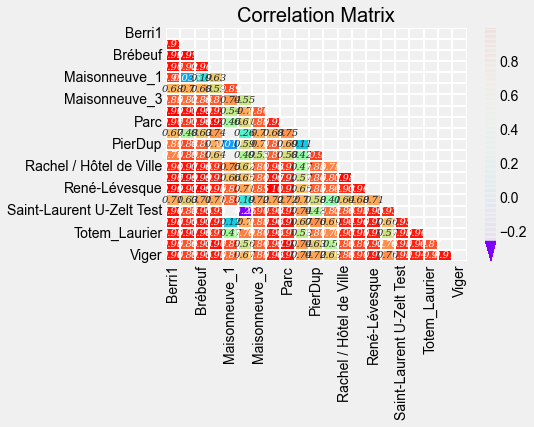

In [6]:
# Define the figure size
#plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Check Missing Value </font>

In [7]:
df.isnull().sum()

Date                             0
Unnamed: 1                       0
Berri1                           0
Boyer                            0
Brébeuf                          0
CSC (Côte Sainte-Catherine)      0
Maisonneuve_1                  257
Maisonneuve_2                    0
Maisonneuve_3                    0
Notre-Dame                       0
Parc                             0
Parc U-Zelt Test               267
PierDup                          0
Pont_Jacques_Cartier           110
Rachel / Hôtel de Ville          0
Rachel / Papineau                0
René-Lévesque                    0
Saint-Antoine                    0
Saint-Laurent U-Zelt Test      269
Saint-Urbain                     0
Totem_Laurier                    0
University                       0
Viger                            0
dtype: int64

Too much missing value in three cols so we should have to remove those cols becuase we have only 319 rows data. we can apply mean strategy but not a good idea here in my opinion 

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Remove Unwanted Columns </font>

In [8]:
df = df.drop(['Date', 'Unnamed: 1', 'Maisonneuve_1', 'Parc U-Zelt Test', 'Pont_Jacques_Cartier', 'Saint-Laurent U-Zelt Test'], axis=1)
df.head()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
0,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6
1,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4
2,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5
3,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6,0
4,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56,10


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Define Predictor and Target Attribute </font>

In [9]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [10]:
X.head()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University
0,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21
1,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77
2,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40
3,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6
4,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56


#### <font color = blue> Target Attribute

In [11]:
Y.head()

0     6
1     4
2     5
3     0
4    10
Name: Viger, dtype: int64

### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [24]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (255, 16)
X_test (255,)


#### <font color = blue> Testing Data

In [25]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (64, 16)
X_test (64,)


### <font color = #27C3E5> 2.6: </font> <font color = #41EA46> Feature Scaling </font>

In [26]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()  # Same Scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.060636,-0.159104,-0.014851,0.240844,0.541863,0.786309,0.004470,0.422176,-0.561043,0.067486,0.158896,-0.213196,0.593231,0.132740,-0.294324,0.525063
1,1.024832,0.553134,0.825138,0.877210,-0.827778,0.937950,0.646347,1.215117,0.130109,0.916626,0.855583,0.609161,1.612866,1.041049,0.530181,1.445084
2,-1.226904,-1.227461,-1.246079,-1.236549,-0.807475,-1.033382,-1.146623,-1.225868,-0.934595,-1.350608,-1.334837,-1.166164,-0.803225,-1.329324,-1.343228,-1.187496
3,-1.262383,-1.230234,-1.244337,-1.236549,-0.864324,-1.055807,-1.155807,-1.264901,-0.937886,-1.297882,-1.342110,-1.162133,-0.843124,-1.274044,-1.169994,-1.238364
4,0.419010,0.359543,0.494458,0.401801,1.042535,0.399731,0.531034,0.518312,0.202515,0.374035,0.396943,0.572881,0.992218,0.927630,0.564535,0.659455


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build the Random Forrest Tree Regression </font>
In this part, we build Random Forrest Regression Model using Scikit-Learn

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn

In [27]:
from sklearn.ensemble import RandomForestRegressor

#### <font color = blue> Initialize the Model

In [28]:
regressor = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=0)

#### <font color = blue> Fit the Model

In [29]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=0)

#### <font color = blue> Predict the Test Data</font>

In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([384.5037049 , 536.15025266,  18.89187566,  18.89187566,
       428.50362603,  18.89187566, 599.90826624, 615.61198971,
       259.82342959, 688.50130574,  18.89187566, 330.7879147 ,
       672.85989915, 205.64049996, 278.28241231,  18.89187566,
       388.78922571, 474.76381486,  18.89187566,  18.89187566,
       417.73363764, 267.70785007, 380.71325705, 683.02000861,
       664.40379473, 177.34278912, 282.57346301,  18.89187566,
        18.89187566, 324.53153715, 668.3792888 ,  18.89187566,
       521.7055838 ,  18.89187566,  18.89187566, 361.53845744,
        18.89187566, 175.63563294,  74.00911049, 259.82342959,
       669.88509186,  95.59182051,  18.89187566, 566.57134311,
       612.15232056,  95.59182051, 553.5718242 , 607.15588529,
        18.89187566,  18.89187566, 383.16560821,  74.00911049,
       599.90826624,  18.89187566, 629.76921399, 664.40379473,
        18.89187566,  99.2314796 , 280.24130489,  18.89187566,
        18.89187566,  18.89187566, 546.89806202, 668.37

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Decision Tree Regression Model. And for evaluation we will use three metrics. <br>
`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>
`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>
`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Evaluate the Results </font>

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### <font color = blue>4.2.1: Calculate the Results

In [32]:
# R Square
R_Square = r2_score(y_pred, y_test)
print('R Square:', R_Square) 

# Mean Square Error
MSE = mean_squared_error(y_pred, y_test)
print('Mean Squared Error:', MSE)

# Mean Square Error
MAE = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', MAE)

R Square: 0.9646436399885321
Mean Squared Error: 2216.57991072853
Mean Absolute Error: 36.1551857859895


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali